<h1 style ="font-size:3rem;color:orange;"> Stroke predictoin code</h1>

**explanatory picture about the stroke :**

<img src="s.png" width="500"/>

**The variables we have in our original dataset:**

1. id: unique identifier

2. gender: "Male", "Female" or "Other"

3. age: age of the patient

4. hypertension: 0 if the patient doesn’t have hypertension, 1 if the patient has hypertension

5. heart_disease: 0 if the patient doesn’t have any heart diseases, 1 if the patient has a heart disease

6. ever_married: "No" or "Yes"

7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. Residence_type: "Rural" or "Urban"

9. avg_glucose_level: average glucose level in blood

10. bmi: body mass index

11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. stroke: 1 if the patient had a stroke or 0 if not


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Libraries we might need 


In [8]:
import numpy as np    # for working with arrays
import pandas as pd   # for dealing with csv files
import matplotlib.pyplot as plt  #for visualization 
import seaborn as sns #for visualization 
import warnings #ti handle warnings
warnings.filterwarnings('ignore') #ignore warnings from when we visualize the data

print("all working") #to check when the libraries are imported 



all working


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# read our cvs file 


- we have 3 files:
      1- original data 
      2- test set 
      3- train set 

In [9]:
original = pd.read_csv("healthcare-dataset-stroke-data.csv") #reading the original dataset
train_file = pd.read_csv("train.csv")  #reading the train file
test_file = pd.read_csv("test.csv")   #reading the test file 
submissions_file=pd.read_csv("sample_submission.csv")  #reading the submission file 

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Check the content of the files

In [10]:
#check the content of the file "original" 
original 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
#check the content of the file "train_file" 
train_file

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [12]:
#check the content of the file "test_file" 
test_file

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


In [13]:
#check the content of the file "submissions_file" 
submissions_file

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296
...,...,...
10199,25503,0.041296
10200,25504,0.041296
10201,25505,0.041296
10202,25506,0.041296


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Check the Null values 

In [14]:
#checking the sum of the null values of each variable in the file "original"
original.isna().sum()  

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
#checking the sum of the null values of each variable in the file "train_file"
train_file.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
#checking the sum of the null values of each variable in the file "test_file"
test_file.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

we notice that the bmi has null values so we replace the null values with the mean

In [17]:
#calculate the mean of the variable bmi 
original['bmi'].mean()

28.893236911794673

In [18]:
#replacing the Na in the variable bmi with its mean 
original_file= original.fillna(28.893236911794673)
original_file 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


now check again if all the null values are gone 

In [19]:
 #making sure we have no NA 
original_file.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Now we Merge our Train set and Original Dataset

 By incorporating the original dataset into the training set, we increase the amount of data available for model training. More data can potentially improve the model's ability to learn patterns, generalize well, and make accurate predictions.


In [20]:
"""
this code below is filtering the original_file DataFrame based on the condition
stroke==1.
It creates a new DataFrame called stroke_1 that contains only the rows 
where the value of the "stroke" column is equal to 1.
"""
stroke_1 = original_file.query("stroke==1") 

"""
the code below statement of code combines the rows of stroke_1 
and train_file DataFrames into a single DataFrame, and drops the 
"id" column from the concatenated DataFrame. The resulting DataFrame 
will contain all the rows and columns from the two original DataFrames, 
except for the "id" column.
"""
merged_data = (pd.concat([stroke_1,train_file],axis=0)).drop(columns=["id"]) 


#this will drop the id columns of the test file 

test_file_2 = test_file.drop(columns=["id"])



In [21]:
#checking if the id column is dropped 
merged_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.500000,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.100000,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.200000,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.500000,Unknown,0


In [22]:
#checking if the id column is dropped 
test_file_2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...
10199,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Numerical and Categorical data types

we have two types of data but in our program we need only the numerical data and it's only going to understand the numerical data.

so we have to convert out categorical data to numerical values in order for the program to understand them.

numerical data --> age ,  avg_glucose_level  , bmi

categorical data -->  gender , hypertension ,  heart_disease ,  ever_married , work_type , Residence_type ,                             smoking_status


In [23]:
#creating a list to include seperates all the numerical variables and categorical 

numerical_data = ['age', 'avg_glucose_level', 'bmi']  #the numerical variables  
categorical_data = ['gender', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'smoking_status'] #the categorical variables 


In [24]:
#we check the unique values of each categorical variable in order to represent it with 
#numerical variable 
uni_work= merged_data['work_type'].unique()      #unique values in the var --> work_type
uni_ever= merged_data['ever_married'].unique()   #unique values in the var --> ever_married
uni_hyper= merged_data['hypertension'].unique()   #unique values in the var --> hypertension
uni_heart= merged_data['heart_disease'].unique()  #unique values in the var --> heart_disease
uni_residence= merged_data['Residence_type'].unique() #unique values in the var --> Residence_type
uni_smoking= merged_data['smoking_status'].unique() #unique values in the var --> smoking_status
uni_gender= merged_data['gender'].unique()         #unique values in the var --> gender

uni_work ,uni_ever,uni_hyper,uni_heart,uni_residence,uni_smoking,uni_gender



(array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 array(['Yes', 'No'], dtype=object),
 array([0, 1]),
 array([1, 0]),
 array(['Urban', 'Rural'], dtype=object),
 array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
       dtype=object),
 array(['Male', 'Female', 'Other'], dtype=object))

so we have : 

work_type --> 'Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'     

ever_married--> 'Yes', 'No'

hypertension --> 0, 1 

heart_disease -->1, 0

Residence_type --> 'Urban', 'Rural'

smoking_status --> 'formerly smoked', 'never smoked', 'smokes', 'Unknown'

gender --> 'Male', 'Female', 'Other'



In [25]:
# convert categorical variables into a numerical representation using dictionaries 
work_type= {'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
ever_married = {'Yes':1, 'No':0}
Residence_type = {'Urban':1, 'Rural':0}
smoking_status={'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}
gender={'Male':0, 'Female':1, 'Other':2}


explanation:

in **work_type**:
- "private" is represented by 0 
- "self_employed" is represented by 1
- "Govt_job" is represented by 2
- "children" is represented by 3
- " Never_worked" is represented by 4

in **ever_married**:
- "yes" is represented by 1
- "No" is represented by 0 

in **residence_type**:
- "Urban" is represented by 1
- "Rural" is represented by 0 

in **smoking_status**:
- "formerly smoked" is represented by 0
- 'never smoked' is represented by 1
- 'smokes is represented by 2
- 'Unknown' is represented by 3

in **gender**:
- "Male" is represented by 0 
- "Female" is represented by 1
- "Other" is represented by 2





**in an upcoming section of this code we will be mapping these numerical representations and replacing them inplace of the categorical representation of these variables.** 



<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Now let's visualize the data

The relationship between stroke and ------ :

**1- Bmi** 

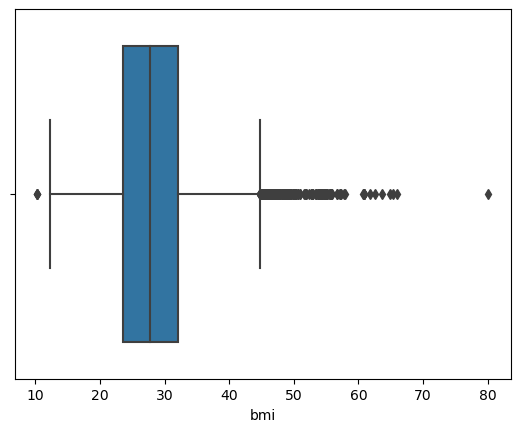

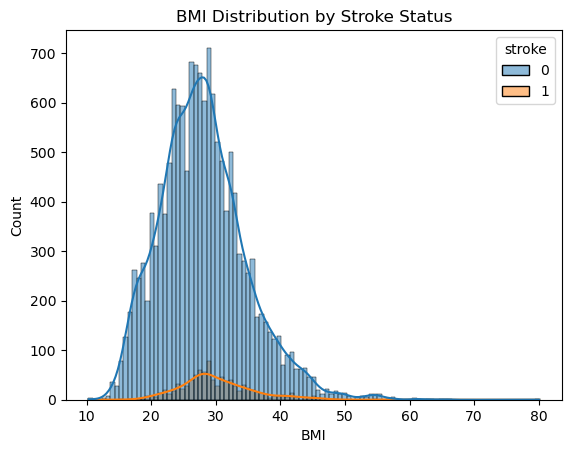

In [26]:
#check outliers 
sns.boxplot(x=merged_data['bmi']) #plot a box plot for the var "bmi"
plt.show()

#relationship between bmi and stroke 

sns.histplot(data=merged_data, x="bmi", hue="stroke", kde=True) #plot a histoplot between "stroke" and "bmi"
plt.title("BMI Distribution by Stroke Status") #setting the plot's title
plt.xlabel("BMI") #setting the plot's x axis's label
plt.ylabel("Count") #setting the plot's y axis's label
plt.show()

we notice that:
- we have outliers so we have to get rid of them.
- stroke is not affected by bmi alot.

**now we get rid of the outliers** 


<Axes: xlabel='bmi'>

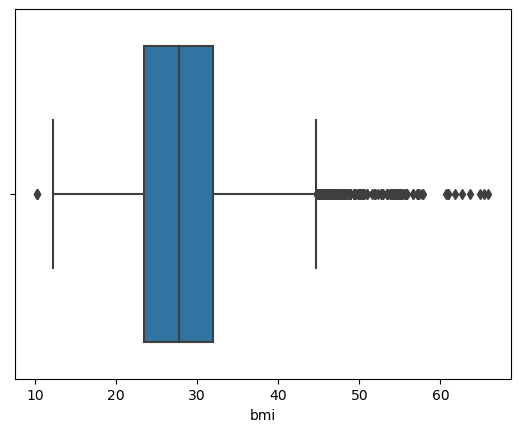

In [27]:
#we drop outliers above or equal to 80
merged_data.drop(merged_data[merged_data['bmi'] >= 80].index, axis=0, inplace=True)

#check if they're dropped
sns.boxplot(x=merged_data['bmi'])

- now we notice that the outliers disappeared 

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

**2- Gender** 

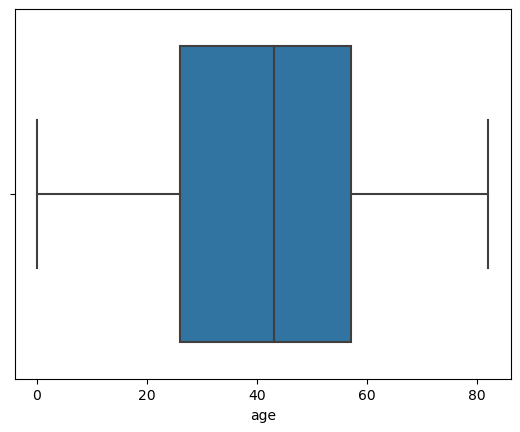

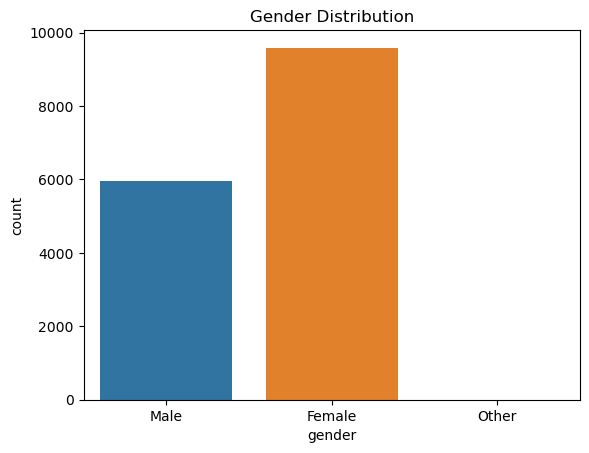

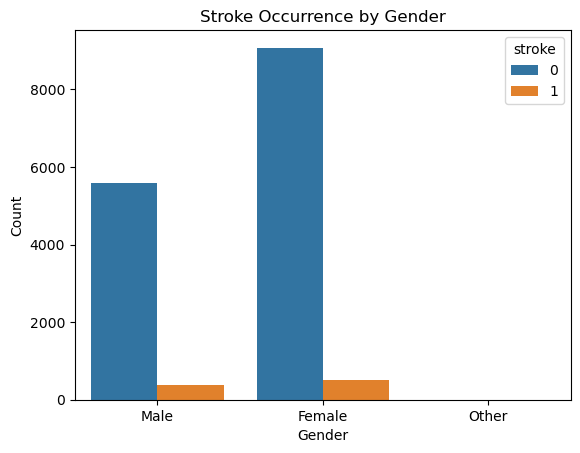

In [28]:
#check for outliers 

sns.boxplot(x=merged_data['age']) #plotting a box plot for the var "age"
plt.show()




#to know the distribution of male and female 

plt.title('Gender Distribution') #title of the plot  
sns.countplot(x=merged_data['gender'])  #plotting a countplot for the var "gender"
plt.show()




#to know the relationship between stroke and gender. 
sns.countplot(data=merged_data, x="gender", hue="stroke")  #ploting a countplot for the var "gender" and "stroke"
plt.title("Stroke Occurrence by Gender") #plot's title
plt.xlabel("Gender") #plot's x axis label
plt.ylabel("Count")  #plot's y axis label
plt.show()

we notice that :
- we don't have outliers
- we have more females than males in our dataset
- it is more likely to have a stroke in femals than males but that also comes from the number of females being higher than males 
- also we don't see a strong correlation between gender and stroke 




<br/><br/>
<hr style="border: 1px solid #fdb515;" />

**3- Age**

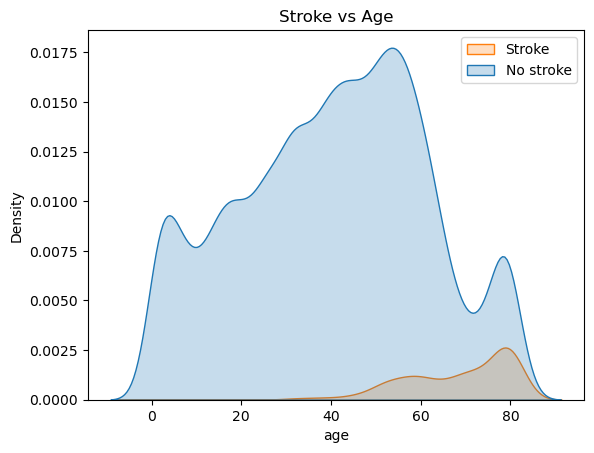

In [29]:
#relationship between age and stroke 

sns.kdeplot(data=merged_data, x='age', hue='stroke', fill=True) #plotting a kdeplot for the var "age" and "stroke"
plt.title('Stroke vs Age') #plot's title
plt.legend(['Stroke', 'No stroke']) #adding a legend to the plot 
plt.show()

so we notice that :

- in the orange region which resembles people that had a stroke we find that it's more likely for people older than 40 to get a stroke 








<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## **4- Hypertension**

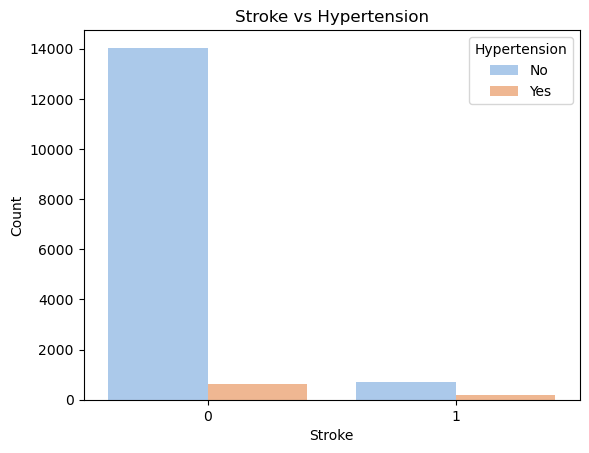

In [30]:
#correlation between hypertension and stroke


sns.countplot(data=merged_data, x='stroke', hue='hypertension', palette='pastel') #plot a countplot for the var "hypertension" and "stroke"
plt.title('Stroke vs Hypertension') #plot's label
plt.xlabel('Stroke') #plot's x axis label 
plt.ylabel('Count')  #plot's y axis label 
plt.legend(title='Hypertension', labels=['No', 'Yes']) #adding a legend to the plot with the title 'Hypertension'
plt.show()

we notice that:
- we have a small liklihood of having a stroke while having hypertension but it's still likely 
- we have a very high probability that if we had no stroke then we have no hypertension 




<br/><br/>
<hr style="border: 1px solid #fdb515;" />

**5- Heart diseases**

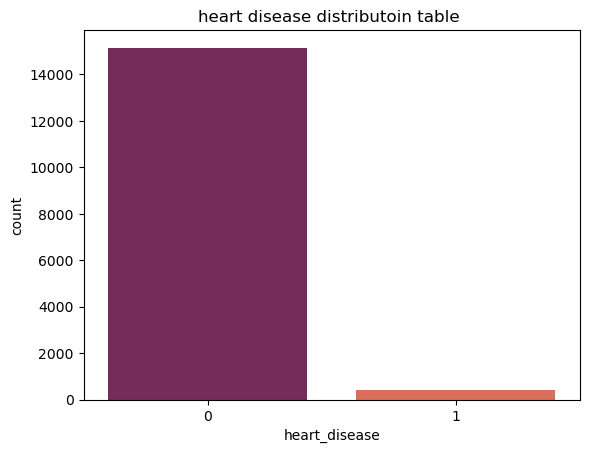

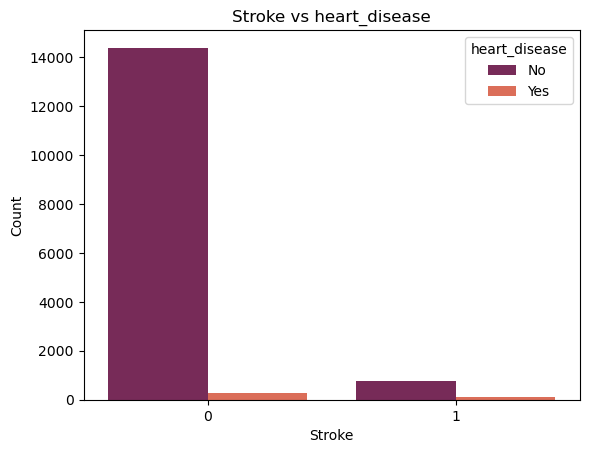

In [31]:

#heartdisease distributoin 

plt.title('heart disease distributoin table ') #plot's title
sns.countplot(x=merged_data['heart_disease'],palette='rocket') #plot a countplot for the var "heart_disease"
plt.show()


#relationship between stroke and heart diseases

sns.countplot(data=merged_data, x='stroke', hue='heart_disease', palette='rocket') #plot a countplot for the var "heart_disease" and "stroke"
plt.title('Stroke vs heart_disease') #plot's title
plt.xlabel('Stroke') #plot's x axis label 
plt.ylabel('Count') #plot's y axis label 
plt.legend(title='heart_disease', labels=['No', 'Yes']) #adding a legend to the plot with the title 'Hypertension'
plt.show()

we notice that :
- in put dataset people that don't have heart diseases are higher than people that do. 
- in the secind graph we notice a slight correlation between having a stroke and having heartdiseases


<br/><br/>
<hr style="border: 1px solid #fdb515;" />

**6- Marriage status**

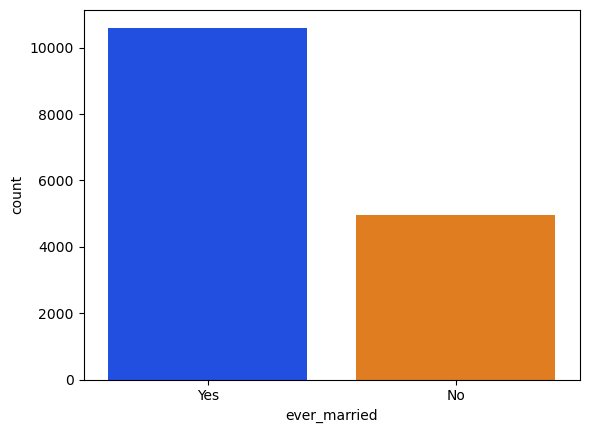

<Axes: xlabel='ever_married', ylabel='count'>

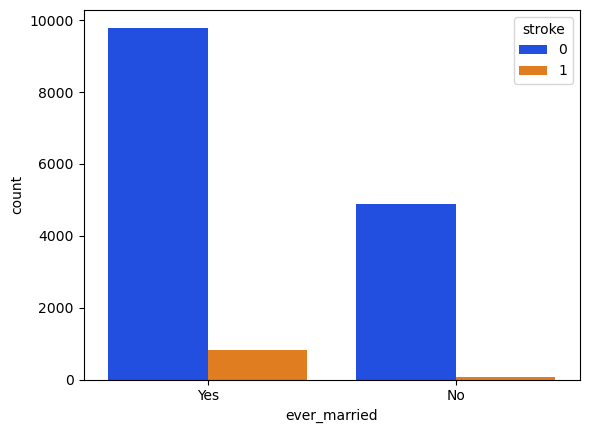

In [32]:
#check the distribution of ever_married data

sns.countplot(x=merged_data['ever_married'], palette='bright') #plot a countplot for the var "ever_married"
plt.show()


#checking the correlatoin between stroke and ever_married vatiable 

sns.countplot(x=merged_data['ever_married'],hue= merged_data['stroke'], palette='bright')#plot a countplot for the var "ever_married"

we notice that : 
- most of our data are from people that are married 
- we notice that if a person is married he has higher chances of getting a stroke than a person that is unmarried 



<br/><br/>
<hr style="border: 1px solid #fdb515;" />

**7- Work** 

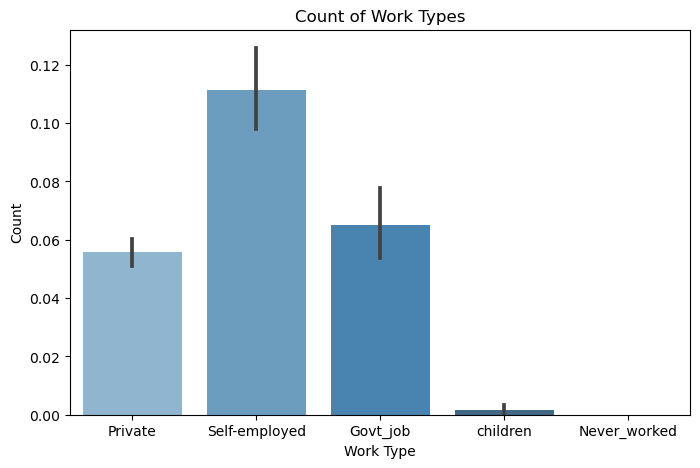

<Axes: xlabel='work_type', ylabel='count'>

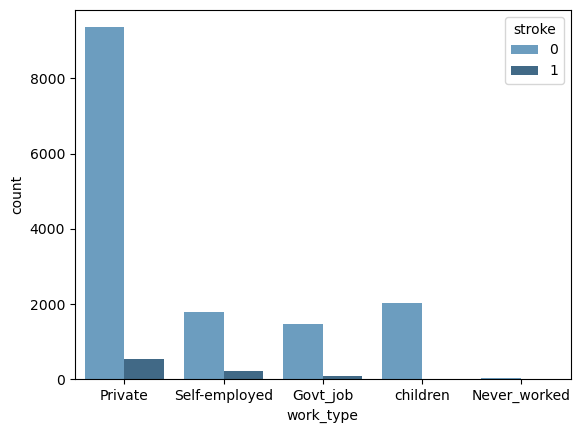

In [33]:
#work types distributoin 

plt.figure(figsize=(8,5)) #setting the figure's size 
sns.barplot(data=merged_data, x='work_type', y='stroke', palette='Blues_d') #plotting a barplot for the var "work_type" and "stroke"
plt.title('Count of Work Types') #plot's title 
plt.xlabel('Work Type') #plot's x axis label 
plt.ylabel('Count') #plot's y axis label 
plt.show()

#correlatoin between work type and stroke 


sns.countplot(x=merged_data['work_type'],hue= merged_data['stroke'], palette='Blues_d') #plotting a countplot for the var "work_type"and "stroke"

we notice that:
- self employed is the most frequent work type
- in cildren and neverworked we have almost 0 cases of having a stroke 
- private job has the highest count of having a stroke 


<br/><br/>
<hr style="border: 1px solid #fdb515;" />

**8- Residence place** 

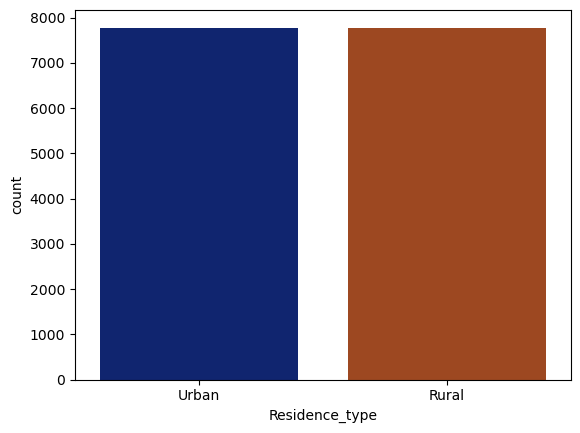

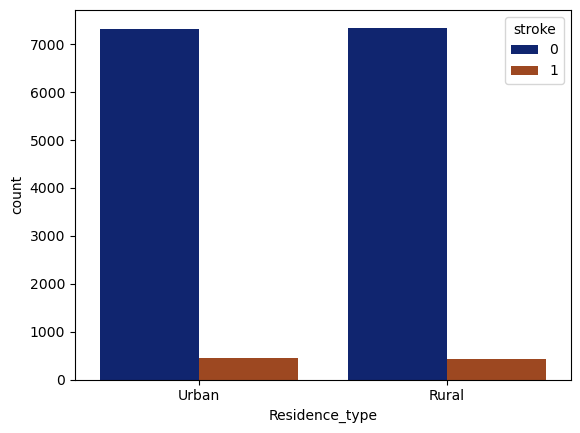

In [34]:
#residence place distributoin 

sns.countplot(x=merged_data['Residence_type'],palette='dark') #plotting a countplot for the var"residence_type"
plt.show()



# correlation between stroke and residence_type variables 

sns.countplot(x=merged_data['Residence_type'],hue= merged_data['stroke'], palette='dark')  #plotting a countplot for the var"residence_type" and"stroke"
plt.show()

we notice that:
- we have alost equal people living in urban and rural 
- and we have almost equal counts of having a stoke and not having a stroke in both residence places 
- so we conclude that residence type does not have alot of correlatoin with having a stroke 


<br/><br/>
<hr style="border: 1px solid #fdb515;" />


**9- Avg_glucose_Levels**

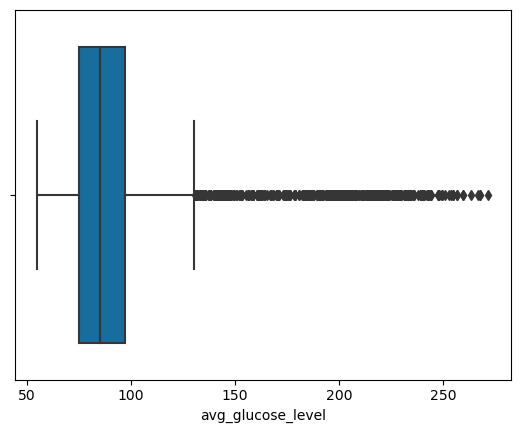

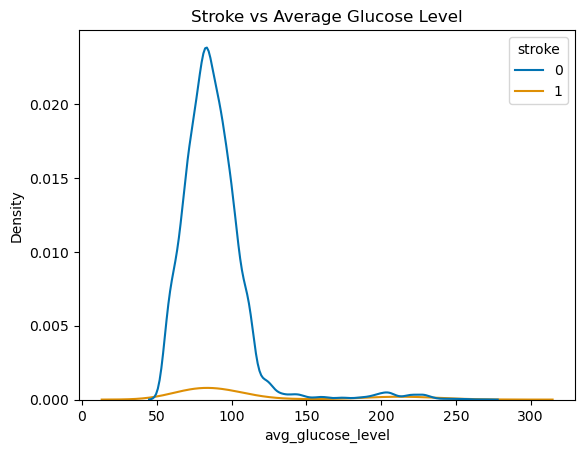

In [35]:
#we check for outlires 
sns.boxplot(x=merged_data['avg_glucose_level'], palette='colorblind') #plotting a boxplot for the var "avg_glucose_level"
plt.show()

#check the correlatoin between avd_glucose_level and stroke

sns.kdeplot(data=merged_data, x='avg_glucose_level', hue='stroke',palette="colorblind") #plotting a kdeplot for the var "avg_glucose_level" and "stroke"
plt.title('Stroke vs Average Glucose Level') #plot's title
plt.show()

we notice that: 
- we don't have outliers 
- it's more likely to have a stroke when the av flucose levels are between 50 and 140 



<br/><br/>
<hr style="border: 1px solid #fdb515;" />

**10- smoking_status**

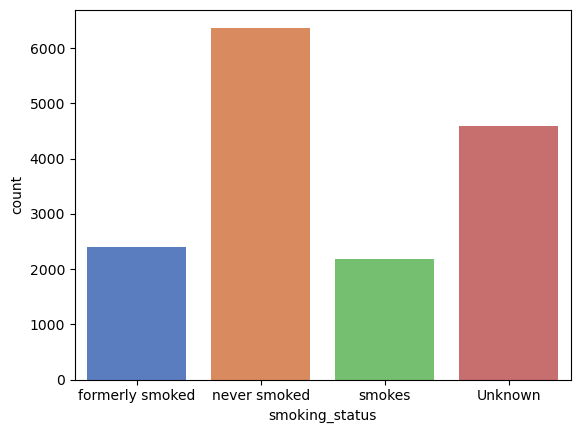

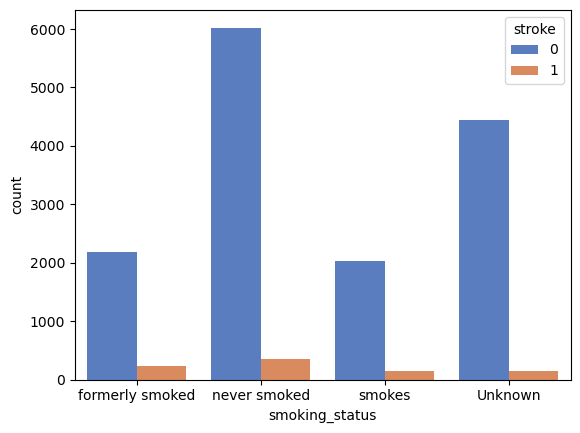

In [36]:
#check the distributoin of smoking_status 

sns.countplot(data=merged_data, x='smoking_status', palette='muted') #plotting a countplot for the var "smoking_status"
plt.show()



#correlatoin between smoking status and stroke 

sns.countplot(x=merged_data['smoking_status'],hue= merged_data['stroke'], palette='muted') #plotting a countplot for the var "smoking_status" and "stroke"
plt.show()


we notice that :
- people that never smoked are the majority 
- we can't spot major correlation between having a sroke and smoking 


<br/><br/>
<hr style="border: 1px solid #fdb515;" />

- **now let's see the heatmap to see the probability of the correlations between all the variables**

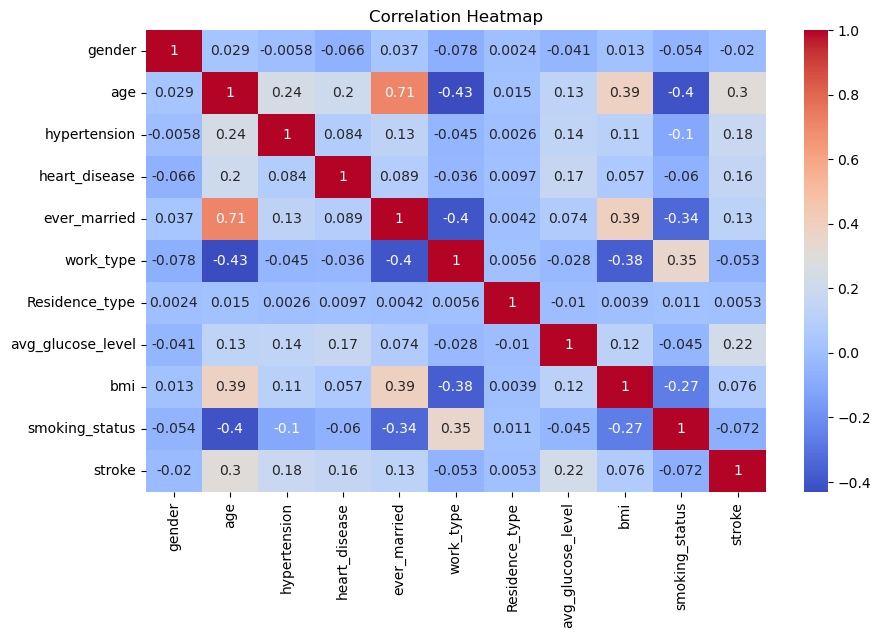

In [162]:
#heatmap 
plt.figure(figsize = (10,6))#the dimensions of the heatmap
sns.heatmap(merged_data.corr(), annot=True, cmap="coolwarm") #plotting a heatmap for all the variables
plt.title("Correlation Heatmap") #plot's title 
plt.show()

we notice that:
- the highest correlation is between stroke and age 

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# mapping the old values to the new ones (label encoding)


remember when we created the dictionaries we converted the categorical data to numerical not we use the map function to replace the old valued with the new ones . 

When the map() function is applied with this dictionary to the 'work_type' column, it will replace each existing value in the column with its corresponding value from the dictionary. 

In [38]:
#checking how our data looks like before mapping
merged_data #old 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.500000,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.100000,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.200000,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.500000,Unknown,0


In [39]:
"""
The explanation of the following code:

in this code we wanted to convert the categorical variables which are:
-work_type
-ever_married
-residence_type
-smoking_status
-gender

in the files :

-merged_data
-train_file
-test_file
-test_file_2 

to numerical variables so all we did is we used the function map to map
the old variables to the new ones that we set in a code above using 
libraries.
                            |
                            |
                            V
"""

merged_data['work_type'] = merged_data['work_type'].map(work_type)
merged_data['ever_married'] = merged_data['ever_married'].map(ever_married)
merged_data['Residence_type'] = merged_data['Residence_type'].map(Residence_type)
merged_data['smoking_status'] = merged_data['smoking_status'].map(smoking_status)
merged_data['gender'] = merged_data['gender'].map(gender)


train_file['work_type'] = train_file['work_type'].map(work_type)
train_file['ever_married'] = train_file['ever_married'].map(ever_married)
train_file['Residence_type'] = train_file['Residence_type'].map(Residence_type)
train_file['smoking_status'] = train_file['smoking_status'].map(smoking_status)
train_file['gender'] = train_file['gender'].map(gender)

test_file['work_type'] = test_file['work_type'].map(work_type)
test_file['ever_married'] = test_file['ever_married'].map(ever_married)
test_file['Residence_type'] = test_file['Residence_type'].map(Residence_type)
test_file['smoking_status'] = test_file['smoking_status'].map(smoking_status)
test_file['gender'] = test_file['gender'].map(gender)


test_file_2['work_type'] = test_file_2['work_type'].map(work_type)
test_file_2['ever_married'] = test_file_2['ever_married'].map(ever_married)
test_file_2['Residence_type'] = test_file_2['Residence_type'].map(Residence_type)
test_file_2['smoking_status'] = test_file_2['smoking_status'].map(smoking_status)
test_file_2['gender'] = test_file_2['gender'].map(gender)

In [40]:
#checking that now we have all our categorical variables converted to numerical 

merged_data #new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.600000,0,1
1,1,61.0,0,0,1,1,0,202.21,28.893237,1,1
2,0,80.0,0,1,1,0,0,105.92,32.500000,1,1
3,1,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,1,79.0,1,0,1,1,0,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,1,22.0,0,0,0,2,1,72.63,19.500000,1,0
15300,1,46.0,1,0,1,0,1,101.19,32.100000,1,0
15301,1,75.0,0,0,1,1,1,87.69,26.200000,1,0
15302,0,46.0,0,0,1,0,0,101.13,22.500000,3,0


In [41]:
#checking that now we have all our categorical variables converted to numerical 
test_file_2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,57.0,0,0,1,0,0,82.54,33.4,3
1,0,70.0,1,0,1,0,1,72.06,28.5,3
2,1,5.0,0,0,0,3,1,103.72,19.5,3
3,1,56.0,0,0,1,2,1,69.24,41.4,2
4,0,32.0,0,0,1,0,0,111.15,30.1,2
...,...,...,...,...,...,...,...,...,...,...
10199,1,27.0,0,0,0,0,1,75.77,17.6,1
10200,0,49.0,0,0,1,0,1,102.91,26.7,3
10201,1,3.0,0,0,0,3,0,104.04,18.3,3
10202,0,31.0,0,0,1,0,1,82.41,28.7,1


In [42]:
#checking that now we have all our categorical variables converted to numerical 
test_file

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,1,57.0,0,0,1,0,0,82.54,33.4,3
1,15305,0,70.0,1,0,1,0,1,72.06,28.5,3
2,15306,1,5.0,0,0,0,3,1,103.72,19.5,3
3,15307,1,56.0,0,0,1,2,1,69.24,41.4,2
4,15308,0,32.0,0,0,1,0,0,111.15,30.1,2
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,1,27.0,0,0,0,0,1,75.77,17.6,1
10200,25504,0,49.0,0,0,1,0,1,102.91,26.7,3
10201,25505,1,3.0,0,0,0,3,0,104.04,18.3,3
10202,25506,0,31.0,0,0,1,0,1,82.41,28.7,1


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# confidence of interval implementation 

In [43]:
from statsmodels.tools import add_constant as add_constant


"""
this code adds a column of ones to the "merged_data", which acts as a 
constant term or intercept in regression models. 
This constant term allows the regression model to estimate 
the intercept coefficient or baseline value.

"""
stroke_df_constant = add_constant(merged_data)
stroke_df_constant.head()

#The constant column is necessary when fitting certain statistical 
#models that require an intercept term.

,const,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0,67.0,0,1,1,0,1,228.69,36.600000,0,1
1,1.0,1,61.0,0,0,1,1,0,202.21,28.893237,1,1
2,1.0,0,80.0,0,1,1,0,0,105.92,32.500000,1,1
3,1.0,1,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,1.0,1,79.0,1,0,1,1,0,174.12,24.000000,1,1


In [44]:
#performs logistic regression using the sm.Logit class from statsmodels.api

import statsmodels.api as sm
import scipy.stats as st

"""
The overall purpose of this code is to perform a logistic regression 
analysis on the merged_data using the specified independent and dependent
variables. The results are then summarized and displayed to provide insights
into the relationships between the variables and the predictive power 
of the model.
"""
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = stroke_df_constant.columns[:-1]
model = sm.Logit(merged_data.stroke,stroke_df_constant[cols])
result = model.fit()
result.summary()

#generate a summary of the regression results, which includes various statistical measures such as coefficient estimates, 
#standard errors, p-values, and confidence intervals.

Optimization terminated successfully.
         Current function value: 0.153522
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                15552
Model:                          Logit   Df Residuals:                    15541
Method:                           MLE   Df Model:                           10
Date:                Tue, 23 May 2023   Pseudo R-squ.:                  0.2946
Time:                        18:18:48   Log-Likelihood:                -2387.6
converged:                       True   LL-Null:                       -3384.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.2697      0.337    -27.510      0.000      -9.930      -8.609
gender               -0.0815      0.080     -1.020      0.308      -0.238       0.075
age                   0.0876      0.003     28.600      0.000       0.082       0.094
hypertension          0.5655      0.104      5.433      0.000       0.362       0.770
heart_disease         0.2829      0.135      2.100      0.036       0.019       0.547
ever_married         -0.3254      0.147     -2.209      0.027      -0.614      -0.037
work_type            -0.0466      0.057     -0.823      0.411      -0.158       0.064
Residence_type       -0.0058      0.078     -0.075      0.940      -0.158       0.147
avg_glucose_level     0.0116      0.001     13.193      0.000       0.010       0.013
bmi                   0.0181      0.007      2.625      0.009       0.005       0.032
smoking_status        0.0843      0.038      2.225      0.026       0.010       0.159
=====================================================================================
"""

In [45]:
#Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

"""
The code code below is used to calculate and display the odds 
ratios, confidence intervals, and p-values for the coefficients of 
a logistic regression model
"""

params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

#calculates the odds ratio, confidence intervals, and p-values based on the regression results obtained from the backward feature elimination. 
#It then prints the results in a tabular format

                   CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                  0.000049       0.000182    0.000094   0.000
gender                 0.788110       1.077975    0.921717   0.308
age                    1.084976       1.098075    1.091506   0.000
hypertension           1.435491       2.158732    1.760353   0.000
heart_disease          1.019038       1.727963    1.326974   0.036
ever_married           0.541072       0.963988    0.722210   0.027
work_type              0.854069       1.066579    0.954428   0.411
Residence_type         0.853657       1.157815    0.994172   0.940
avg_glucose_level      1.009924       1.013411    1.011666   0.000
bmi                    1.004598       1.032124    1.018268   0.009
smoking_status         1.010109       1.171900    1.088001   0.026


**HYPOTHESIS TESTING** 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

"""
performs logistic regression using the LogisticRegression class from scikit-learn. 
It splits the dataset into training and testing sets using the train_test_split
function and fits a logistic regression model on the training data.
"""

y = merged_data['stroke']
X = merged_data.drop(['stroke'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)


logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)



<Axes: >

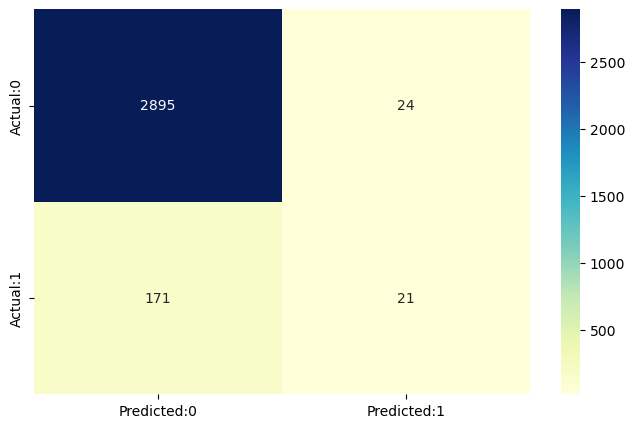

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

"""
the following code calculates the confusion matrix based on the predicted and 
true labels and then create a DataFrame to organize the matrix, 
and visualize the confusion matrix as a heatmap.
"""
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion Matrix shows 3899 correct predictions and 179+3=182 incorrect ones

True Positives : 2

True Negatives : 3899

False Positives: 3 (Type 1 Error)

False Negatives: 179 (Type 2 Error)

In [48]:
"""
now we compute the sensitivity and specificity, which are important 
evaluation metrics for classification models. 

Sensitivity --> indicates how well the model detects positive instances, 

while 

specificity --> indicates how well the model identifies negative instances.

"""

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [49]:
#Model Evaluation - Statistics
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9373191899710704 
 The Missclassification = 1-Accuracy =  0.06268081002892956 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.109375 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9917780061664954 
 Positive Predictive value = TP/(TP+FP) =  0.4666666666666667 
 Negative predictive Value = TN/(TN+FN) =  0.9442270058708415 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  13.30273437499998 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.8980084196891192


Based on the values we were provided, the specificity (True Negative Rate) of the model is higher than the sensitivity (True Positive Rate).
In other words, the model performs better at correctly identifying non-stroke cases (true negatives) than stroke cases (true positives). It has a high ability to avoid false positives (FP) and accurately classify negative instances, but its ability to detect true positives (stroke cases) is relatively low.
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.
Since the model is predicting Stroke disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity, threshold can be lowered.

In [50]:
#lower threshold 

"""
 By adjusting the threshold, the classification of instances can be fine-tuned,
 allowing for exploration of the trade-off between sensitivity and specificity.

"""
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,threshold=i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[2565  354]
 [  59  133]] 
 with 2698 correct predictions and 59 Type II errors( False Negatives) 

 Sensitivity:  0.6927083333333334 Specificity:  0.8787255909558068 



With 0.2 threshold the Confusion Matrix is  
 [[2747  172]
 [ 117   75]] 
 with 2822 correct predictions and 117 Type II errors( False Negatives) 

 Sensitivity:  0.390625 Specificity:  0.9410757108598835 



With 0.3 threshold the Confusion Matrix is  
 [[2839   80]
 [ 141   51]] 
 with 2890 correct predictions and 141 Type II errors( False Negatives) 

 Sensitivity:  0.265625 Specificity:  0.9725933538883179 



With 0.4 threshold the Confusion Matrix is  
 [[2877   42]
 [ 164   28]] 
 with 2905 correct predictions and 164 Type II errors( False Negatives) 

 Sensitivity:  0.14583333333333334 Specificity:  0.9856115107913669 





<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Understand Mutual Information (feature engineering)

- Mutual information (MI) is a non-negative value that measures the mutual dependence between two random variables. The mutual information measures the amount of information we can know from one variable by observing the values of the second variable

In [51]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.feature_engineering_new.ex2 import *

import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import mutual_info_regression

"""
make_mi_scores function provides a convenient way to calculate and obtain 
the MI scores for each feature in a dataset with respect to a given target variable.

                            |
                            |
                            v

"""

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores



In [52]:
#compute mutual information scores for the Ames features:

X = merged_data.copy()
y = X.pop('stroke')

mi_scores = make_mi_scores(X, y)

In [53]:
#examine the scores using the functions in this cell. Look especially at top and bottom ranks.

print(mi_scores.head(20))


age                  0.061926
avg_glucose_level    0.028303
bmi                  0.019067
work_type            0.011315
ever_married         0.011304
hypertension         0.009127
heart_disease        0.005856
smoking_status       0.002608
gender               0.000000
Residence_type       0.000000
Name: MI Scores, dtype: float64


note that When MI is zero, the quantities are independent:
- so gender and residence_type are both independent variables 
-the rest are dependent and the most dependent is the age variable with the stroke 

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Now let's make our predictoin model 

In [136]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score



X = merged_data.drop(['stroke'], axis=1).copy() #seperating my dependent variable
Y = merged_data['stroke'].copy()  # my dependent variable 
X_test = test_file_2.copy()  #my test file 



"""
the following lists are lists used to store the cross-validation scores, feature importances, and test predictions

"""


lgb_cv_scores = list()
lgb_importances = list()
lgb_preds_test = list()


"""
we first initialize a stratifiedfold object and we specify It to have 5 fold and then we'll use it to split 
the data into train and validation sets . The an LGBMClassifier model is initialized with a specified 
hyperparameter then we fit the data using the fit function and then we use predict.proba function to predict 
probability for the validation data. And then lgb_cv_score is calculated as the mean of the lgb_cv_scores list,
representing the average cross-validated ROC AUC score over the 5 folds.

"""

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, Y)):
    
    # split into train, valid
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    Y_train, Y_valid = Y.iloc[train_index], Y.iloc[valid_index]

    # model
    lgb_md = LGBMClassifier(n_estimators = 1000,
                            max_depth = 7,
                            learning_rate = 0.01,
                            num_leaves = 20,
                            reg_alpha = 3,
                            reg_lambda = 3,
                            subsample = 0.7,
                            colsample_bytree = 0.7)
    
    # train
    lgb_md.fit(X_train, Y_train)

    # importances
    lgb_importances.append(lgb_md.feature_importances_)
    
    # validation
    lgb_pred_valid = lgb_md.predict_proba(X_valid)[:, 1]
    lgb_cv_scores.append(roc_auc_score(Y_valid, lgb_pred_valid))
   

    # test
    lgb_pred_test = lgb_md.predict_proba(X_test)[:, 1]
    lgb_preds_test.append(lgb_pred_test)

    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {lgb_cv_scores[-1]}')
    print('-----------------------------------------------------')


# folds score
lgb_cv_score = np.mean(lgb_cv_scores)    
print(f'Score over 5-folds : {lgb_cv_score}')


fold : 1
score : 0.8904409244432121
-----------------------------------------------------
fold : 2
score : 0.88862474833514
-----------------------------------------------------
fold : 3
score : 0.9154214692941687
-----------------------------------------------------
fold : 4
score : 0.8935598314432669
-----------------------------------------------------
fold : 5
score : 0.9017242981966909
-----------------------------------------------------
Score over 5-folds : 0.8979542543424957


In [58]:
"""
The code calculates the mean predicted probabilities for stroke from the LightGBM classifier 
predictions obtained from cross-validation. It then updates the 'stroke' column in the 
submissions_file DataFrame with the calculated probabilities. Finally, it saves the modified 
DataFrame as a CSV file named 'submission.csv' and prints "done" to indicate the completion of the process.
"""


preds = pd.DataFrame(lgb_preds_test).apply(np.mean, axis = 0)
submissions_file['stroke'] = preds
submissions_file.to_csv('submission.csv', index = False)
print("done")


done


In [59]:

submissions_file


,id,stroke
0,15304,0.035476
1,15305,0.238967
2,15306,0.000844
3,15307,0.078719
4,15308,0.003402
...,...,...
10199,25503,0.001232
10200,25504,0.011445
10201,25505,0.000873
10202,25506,0.002064


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />